Data Understanding and EDA 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df=pd.read_csv("data\Mobile_payments_data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\VIR MACHRA\AppData\Local\Temp\ipykernel_21012\1162817755.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("data\Mobile_payments_data.csv")
C:\Users\VIR MACHRA\AppData\Local\Temp\ipykernel_21012\1162817755.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("data\Mobile_payments_data.csv")


NameError: name 'pd' is not defined

In [4]:
## data understanding and profiling
print("Shape of the dataset",df.shape)
print("Columns :",df.columns.tolist())
print("data types", df.dtypes)
print("missing values",df.isnull().sum())


Shape of the dataset (10000, 9)
Columns : ['transaction_id', 'timestamp', 'user_id', 'amount', 'merchant_id', 'location', 'device_type', 'transaction_type', 'is_fraud']
data types transaction_id       object
timestamp            object
user_id               int64
amount              float64
merchant_id           int64
location             object
device_type          object
transaction_type     object
is_fraud              int64
dtype: object
missing values transaction_id      0
timestamp           0
user_id             0
amount              0
merchant_id         0
location            0
device_type         0
transaction_type    0
is_fraud            0
dtype: int64


In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce', dayfirst=True)


In [6]:
if 'is_fraud' in df.columns:
    print("Fraud distribution",df['is_fraud'].value_counts(normalize=True)*100)
else:
    print("No is_fraud column found")

Fraud distribution is_fraud
0    97.86
1     2.14
Name: proportion, dtype: float64


Summary:
Shape of the dataset (10000 - records/rows, 9-columns)
No missing values
Fraud distribution: 
  Non-Fraud-97.86%
  Fraud- 2.14 %


In [7]:
# Starting with EDA
fraud_counts=df['is_fraud'].value_counts()
fraud_ratio=df['is_fraud'].value_counts(normalize=True)*100
print("Fraud Counts",fraud_counts)
print("Fraud Ratio(%)", fraud_ratio)


Fraud Counts is_fraud
0    9786
1     214
Name: count, dtype: int64
Fraud Ratio(%) is_fraud
0    97.86
1     2.14
Name: proportion, dtype: float64


Time-Based Analysis

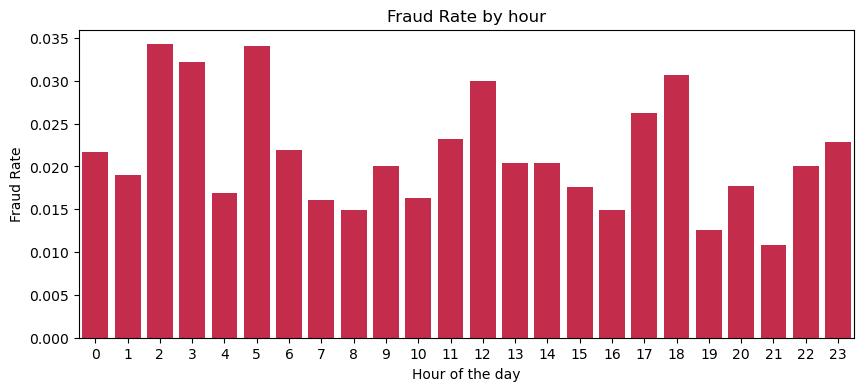

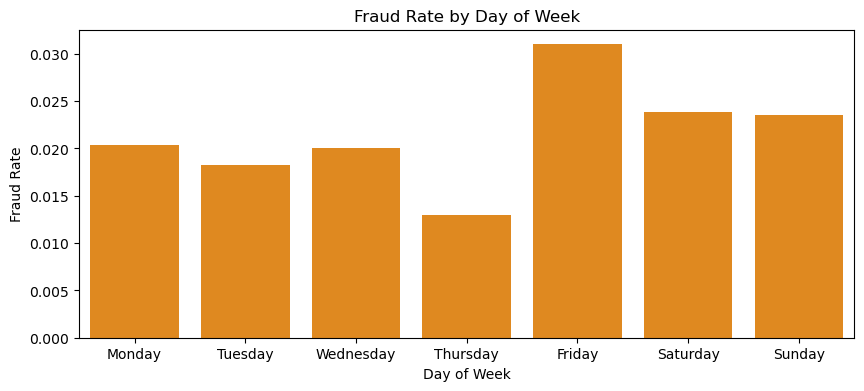

In [21]:
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce',dayfirst=True)
df['hour']=df['timestamp'].dt.hour
df['day_of_week']=df['timestamp'].dt.day_name()

fraud_by_hour=df.groupby('hour')['is_fraud'].mean()
fraud_by_day=df.groupby('day_of_week')['is_fraud'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,4))
sns.barplot(x=fraud_by_hour.index,y=fraud_by_hour.values,color='crimson')
plt.title('Fraud Rate by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Fraud Rate')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=fraud_by_day.index,y=fraud_by_day.values,color='darkorange')
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Rate')
plt.show()


User Related Analysis

In [23]:
df.sort_values(['user_id','timestamp'],inplace=True)
df['time_diff']=df.groupby('user_id')['timestamp'].diff().dt.total_seconds()
df['time_diff']=df['time_diff'].fillna(0)

## Avg amount per user
user_avg_amount=df.groupby('user_id')['amount'].mean()
print(user_avg_amount)
fraud_user_ratio=df.groupby('user_id')['is_fraud'].mean()
print(fraud_user_ratio)

## users with high fraud ratio
risky_users=fraud_user_ratio[fraud_user_ratio>0.5].sort_values(ascending=False).head(10)
print(risky_users)

user_id
1000    4915.548485
1001    4856.128585
1002    5190.446522
1003    5017.666623
1004    5143.799405
           ...     
1095    5099.667500
1096    4949.318144
1097    5053.252718
1098    5012.936923
1099    4787.022105
Name: amount, Length: 100, dtype: float64
user_id
1000    0.020202
1001    0.028302
1002    0.010870
1003    0.038961
1004    0.011905
          ...   
1095    0.011905
1096    0.000000
1097    0.000000
1098    0.043956
1099    0.010526
Name: is_fraud, Length: 100, dtype: float64
Series([], Name: is_fraud, dtype: float64)


           count          mean           std    min        25%       50%  \
is_fraud                                                                   
0         9786.0   4960.719917   2864.607996  10.70  2494.6350   4954.76   
1          214.0  15220.384252  10376.630329  18.81  6572.6725  13334.38   

                 75%       max  
is_fraud                        
0          7352.7100   9999.77  
1         22931.3975  41781.93  


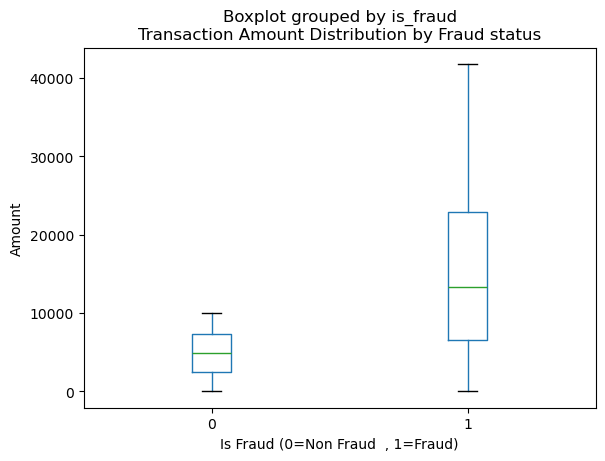

In [8]:
## Transaction Amount and Fraud Analysis
fraud_amount_stats=df.groupby('is_fraud')['amount'].describe()
print(fraud_amount_stats)

df.boxplot(column='amount',by='is_fraud',grid=False)
plt.title("Transaction Amount Distribution by Fraud status")
plt.xlabel("Is Fraud (0=Non Fraud  , 1=Fraud)")
plt.ylabel("Amount")
plt.show()

In [9]:
fraud_by_type=df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
print("\nFraud Rate by Transaction Type(%):\n",fraud_by_type*100)


Fraud Rate by Transaction Type(%):
 transaction_type
transfer    2.416052
top-up      2.374357
bill        1.907922
purchase    1.870229
Name: is_fraud, dtype: float64


In [10]:
fraud_by_device=df.groupby("device_type")['is_fraud'].mean().sort_values(ascending=False)
print("Fraud by Device type(%):\n",fraud_by_device*100)


Fraud by Device type(%):
 device_type
Web        2.525867
iOS        2.356802
Android    1.546698
Name: is_fraud, dtype: float64


In [17]:
## top 10 locations by fraud Rate
fraud_by_location=(df.groupby('location')['is_fraud'].mean().sort_values(ascending=False).head(3))
print("\n Top 3 Locations by fraud Rate(%):\n",fraud_by_location*100)


 Top 3 Locations by fraud Rate(%):
 location
Delhi      2.694757
Kolkata    2.128713
Chennai    2.096115
Name: is_fraud, dtype: float64


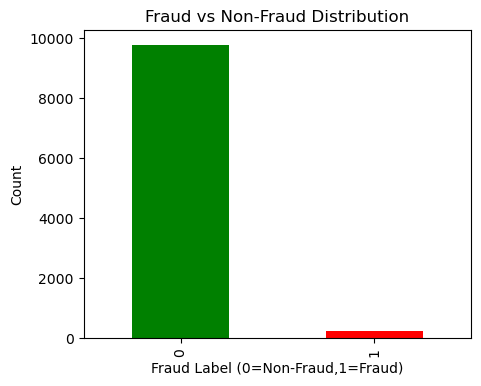

In [14]:
## Visualize Fraud Distribution
plt.figure(figsize=(5,4))
fraud_counts.plot(kind='bar',color=['green','red'])
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Fraud Label (0=Non-Fraud,1=Fraud)")
plt.ylabel('Count')
plt.show()

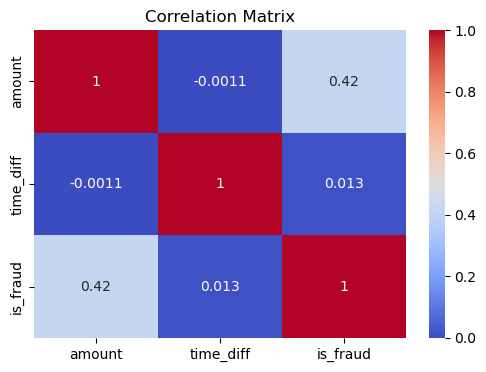

In [24]:
## checking for correlation
corr = df[['amount', 'time_diff', 'is_fraud']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

total 2.14% fraud data

most Fraud Rate by Transaction Type(%):
 transaction_type
transfer    2.416052

most Fraud by Device type(%):
 device_type
Web        2.525867

 Top 3 Locations by fraud Rate(%):
 location
Delhi        2.694757
Kolkata      2.128713
Chennai      2.096115

